In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [3]:
model1 = Xception(weights= 'imagenet', input_shape= (299,299,3))

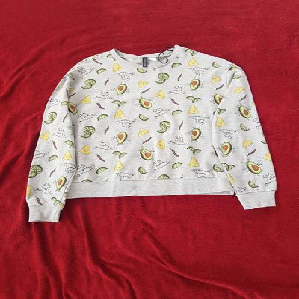

In [4]:
path = "./clothing-dataset-small/train/longsleeve/0098b1c0-bd39-41c2-a172-17066bc9fd26.jpg"
img = load_img(path, target_size= (299,299,3))
img

In [5]:
arr = np.array(img)
arr = np.array([arr])
x = preprocess_input(arr)

In [7]:
pred = model1.predict(x)
decode_predictions(pred)

1/1 [==============================] - 3s 3s/step


[[('n02730930', 'apron', 0.40381363),
  ('n03877472', 'pajama', 0.25584534),
  ('n03595614', 'jersey', 0.08828288),
  ('n04370456', 'sweatshirt', 0.029695194),
  ('n04235860', 'sleeping_bag', 0.01996124)]]

In [8]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_data = train_gen.flow_from_directory('./clothing-dataset-small/train/', target_size= (299,299), batch_size = 32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_data = val_gen.flow_from_directory('./clothing-dataset-small/validation/', target_size= (299,299), batch_size = 32, shuffle = False)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data = test_gen.flow_from_directory('./clothing-dataset-small/test/', target_size= (299,299), batch_size = 32, shuffle = False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
Found 372 images belonging to 10 classes.


In [18]:
X, y = next(train_data)

In [9]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299,299,3))
base_model.trainable(False)

In [21]:
input = keras.Input(shape = (299,299,3))

base = base_model(input, training = False)

pooling = keras.layers.pooling.GlobalAveragePooling2D()(base)

output = keras.layers.Dense(10)(pooling)

model2 = keras.Model(input, output)

In [24]:
lr = 0.001
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [26]:
model2.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
history = model2.fit(train_data, epochs=10, validation_data = val_data)

Epoch 1/10


In [22]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')

plt.xticks(np.arange(10))
plt.legend()

1/1 [==============================] - 17s 17s/step


In [23]:
def make_model(learning_rate = 0.001):
    input = keras.Input(shape = (299,299,3))

    base = base_model(input, training = False)

    pooling = keras.layers.pooling.GlobalAveragePooling2D()(base)

    output = keras.layers.Dense(10)(pooling)

    model2 = keras.Model(input, output)

    lr = learning_rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model2.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    history = model2.fit(train_data, epochs=10, validation_data = val_data)

    return model2, history

(32, 10)


In [ ]:
scores = {}

for i in [0.0001, 0.001, 0.01,0.1]:
    model,hist = make_model(learing_rate = i)
    scores[i] = hist.history
    print()

In [ ]:
for lr, hist in scores.items:
    plt.plot(hist['val_accuracy'], label = ('validation=%S', lr))
    #plt.plot(hist['accuracy'], label = ('trein=%S', lr))

    plt.legend()

In [ ]:
#del scores[0.01]
#del scores[0.0001]

In [ ]:
learning_rate = 0.001
model,hist = make_model(learing_rate = learning_rate)
#model.save_weights('xception_v1.h5', save_format = 'h5')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch=02d}_{val_accuracy:.3f}.h5',
                                              save_best_only = True,
                                              monitor = 'val_accuracy',
                                              mode = 'max')

learning_rate = 0.001
input = keras.Input(shape = (299,299,3))

base = base_model(input, training = False)

pooling = keras.layers.pooling.GlobalAveragePooling2D()(base)

output = keras.layers.Dense(10)(pooling)

model = keras.Model(input, output)

lr = learning_rate
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
history = model.fit(train_data, epochs=10, validation_data = val_data, callbacks=[checkpoint])

In [ ]:
def make_model(learning_rate = 0.001, size = 100, drop = 0):

    # checkpoint = keras.callbacks.ModelCheckpoint('xception_v2_{epoch=02d}_{val_accuracy:.3f}.h5',
    #                                           save_best_only = True,
    #                                           monitor = 'val_accuracy',
    #                                           mode = 'max')

    input = keras.Input(shape = (299,299,3))

    base = base_model(input, training = False)

    pooling = keras.layers.pooling.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size, activation = 'relu')(pooling)

    regularization = keras.layers.Dropout(drop)

    output = keras.layers.Dense(10)(inner)

    model2 = keras.Model(input, output)

    lr = learning_rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model2.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    history = model2.fit(train_data, epochs=10, validation_data = val_data)

    return model2, history

In [ ]:
scores = {}
learning_rate = 0.001

for i in [10, 100, 1000]:
    model,hist = make_model(learing_rate = learning_rate, size=i)
    scores[i] = hist.history
    print(i)

In [ ]:
def make_model(learning_rate = 0.001, size = 100, drop = 0.2):

    # checkpoint = keras.callbacks.ModelCheckpoint('xception_v2_{epoch=02d}_{val_accuracy:.3f}.h5',
    #                                           save_best_only = True,
    #                                           monitor = 'val_accuracy',
    #                                           mode = 'max')

    input = keras.Input(shape = (299,299,3))

    base = base_model(input, training = False)

    pooling = keras.layers.pooling.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size, activation = 'relu')(pooling)

    regularization = keras.layers.Dropout(drop)(inner)

    output = keras.layers.Dense(10)(regularization)

    model2 = keras.Model(input, output)

    lr = learning_rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model2.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    return model2

In [ ]:
scores = {}
learning_rate = 0.001
size = 10

for i in [0.2,0.4,0.6,0.8,1]:
    model = make_model(learing_rate = learning_rate, size=size, drop = i)
    hist = model2.fit(train_data, epochs=10, validation_data = val_data)
    scores[i] = hist.history
    print(i)

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                zoom_range = 0.1, shear_range = 10.0, vertical_flip = True)
train_data = train_gen.flow_from_directory('./clothing-dataset-small/train/', target_size= (299,299), batch_size = 32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_data = val_gen.flow_from_directory('./clothing-dataset-small/validation/', target_size= (299,299), batch_size = 32, shuffle = False)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data = test_gen.flow_from_directory('./clothing-dataset-small/test/', target_size= (299,299), batch_size = 32, shuffle = False)

In [ ]:
scores = {}
learning_rate = 0.001
size = 10
drop = 0.2

for i in [0.2,0.4,0.6,0.8,1]:
    model = make_model(learing_rate = learning_rate, size=size, drop = 0.2)
    hist = model2.fit(train_data, epochs=10, validation_data = val_data)
    scores[i] = hist.history
    print(i)